*** Important all the important modules ***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*** Read the data from the CSV files and store in the Dataframe ***

In [3]:
features_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\features.csv')
stores_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\stores.csv')
train_data_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\train.csv')
test_data_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\test.csv')
sample_submission_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project 2\Walmart Data\sampleSubmission.csv')

*** Lets do initial analysis on all these data ***

In [4]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features_df.shape

(8190, 12)

In [6]:
features_df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [7]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [8]:
features_df['Store'].value_counts().head()

43    182
41    182
33    182
29    182
25    182
Name: Store, dtype: int64

We see that each stores have 182 sample records 

Lets see if each stores have same span of date range.

In [9]:
features_df.groupby('Store')['Date'].agg({'MinDate':'min','Maxdate':'max'}).head()

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,MinDate,Maxdate
Store,,
1,2010-02-05,2013-07-26
2,2010-02-05,2013-07-26
3,2010-02-05,2013-07-26
4,2010-02-05,2013-07-26
5,2010-02-05,2013-07-26


We can see for each store there is same date range. The range is between 2/5/2010 to 7/26/2013

In [10]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Lets join stores and features data frames

In [11]:
df = pd.merge(features_df,stores_df,on='Store',how='inner')

In [12]:
df = df.fillna(0)

In [13]:
train_data_df.shape

(421570, 5)

In [14]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [15]:
a = df[['Store','Size']]
b=a.groupby('Store')['Size'].max()
type(b)

pandas.core.series.Series

In [16]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [17]:
final_features = df

Now lets analyze the training data

In [18]:
df = train_data_df['Store'].value_counts().reset_index()
df.sort_values(by='index')

,index,Store
3,1,10244
4,2,10238
34,3,9036
2,4,10272
35,5,8999
9,6,10211
26,7,9762
20,8,9895
36,9,8867
1,10,10315


In [19]:
train_data_df.groupby('Store')['Dept'].nunique()

Store
1     77
2     78
3     72
4     78
5     72
6     77
7     76
8     76
9     73
10    77
11    78
12    75
13    79
14    77
15    79
16    76
17    76
18    78
19    79
20    78
21    77
22    76
23    77
24    77
25    77
26    76
27    78
28    77
29    77
30    64
31    76
32    77
33    63
34    78
35    74
36    63
37    62
38    63
39    75
40    77
41    77
42    62
43    61
44    62
45    74
Name: Dept, dtype: int64

We can see in the training data we have for each walmart store on an average 77 different departments

In [20]:
final_target = train_data_df[['Store','Dept','Weekly_Sales']]

In [21]:
train_data_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [22]:
final_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [23]:
final_df = pd.merge(train_data_df,final_features,on=('Store','Date'),how='inner')

In [24]:
final_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315


Now we created final dataframe with all the features and targets. We can now analyze on this. We will try to find what all the important features are there on which target - weekly sales are affecting the most.

In [25]:
a = final_df.groupby('Dept')['Weekly_Sales'].mean().reset_index()
b= a.sort_values(by='Weekly_Sales',ascending=False)

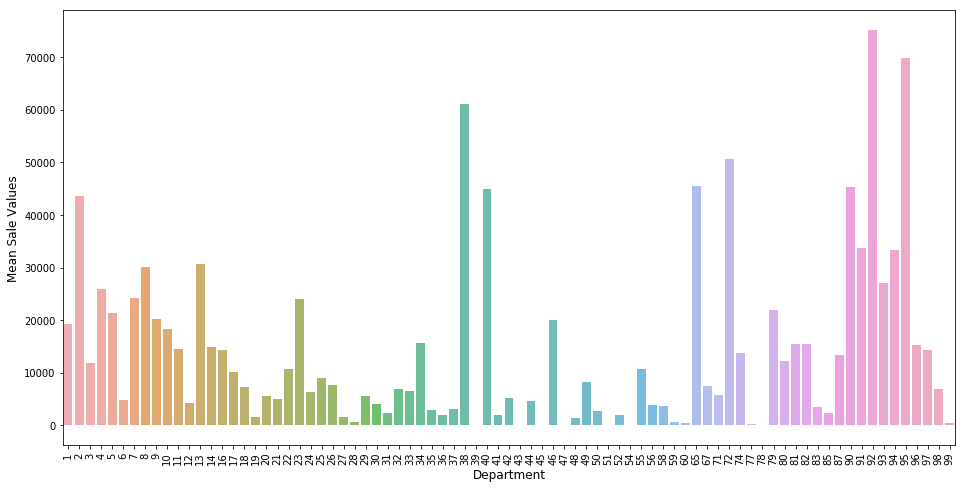

In [26]:
plt.figure(figsize = (16,8))
sns.barplot(b['Dept'], b['Weekly_Sales'], alpha=0.8)
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

We see that Mean sales value varies a lot with different Department. Department near 90s are generally high. 

In [27]:
a = final_df.groupby('IsHoliday_x')['Weekly_Sales'].mean().reset_index()
a

,IsHoliday_x,Weekly_Sales
0,False,15901.445069
1,True,17035.823187


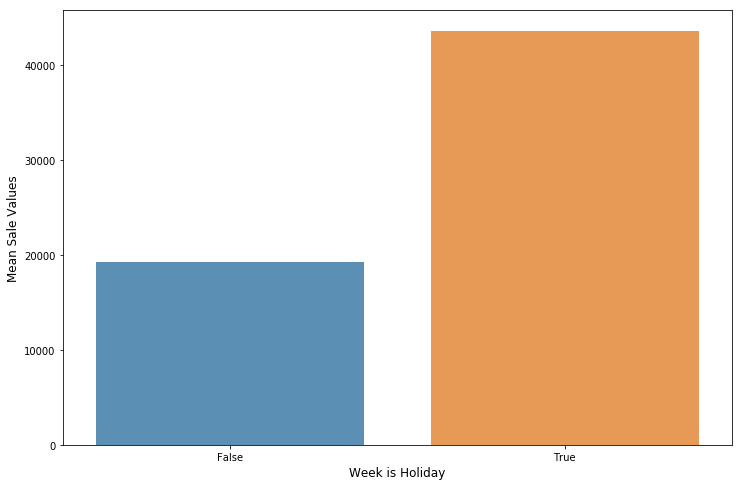

In [28]:
plt.figure(figsize = (12,8))
sns.barplot(a['IsHoliday_x'], b['Weekly_Sales'], alpha=0.8)
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Week is Holiday', fontsize=12)
#plt.legend()
plt.show()

Clearly we see the sales value are high accross all Walmart on the holiday weeks.

In [29]:
a = final_df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
store_weekly_sales_df = pd.merge(a,final_features,on=('Store','Date'),how='inner')
store_weekly_sales_df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,A,151315
5,1,2010-03-12,1439541.59,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,False,A,151315
6,1,2010-03-19,1472515.79,54.58,2.720,0.00,0.00,0.00,0.00,0.00,211.215635,8.106,False,A,151315
7,1,2010-03-26,1404429.92,51.45,2.732,0.00,0.00,0.00,0.00,0.00,211.018042,8.106,False,A,151315
8,1,2010-04-02,1594968.28,62.27,2.719,0.00,0.00,0.00,0.00,0.00,210.820450,7.808,False,A,151315
9,1,2010-04-09,1545418.53,65.86,2.770,0.00,0.00,0.00,0.00,0.00,210.622857,7.808,False,A,151315


In [30]:
df = store_weekly_sales_df[['Size','Temperature','Fuel_Price','Weekly_Sales']]


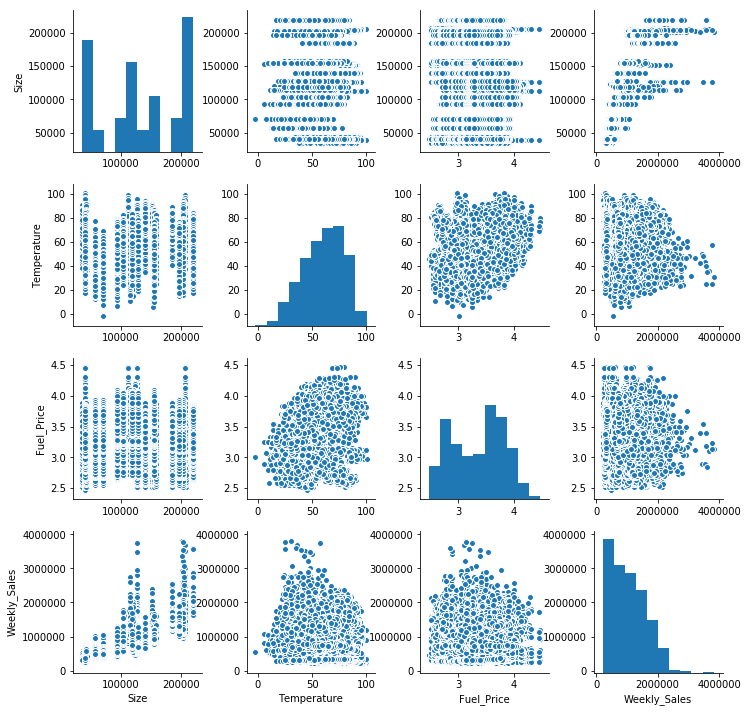

In [31]:
plt.figure(figsize = (16,8))
sns.pairplot(df)
plt.show()

We just took 3 features, store size, temperature & fuel prize and 1 target weekly sales and try to setup some relationship between them. We see that store size definetly impact weekly sales. Temperature & Fuel prize does little impact on the weekly sales

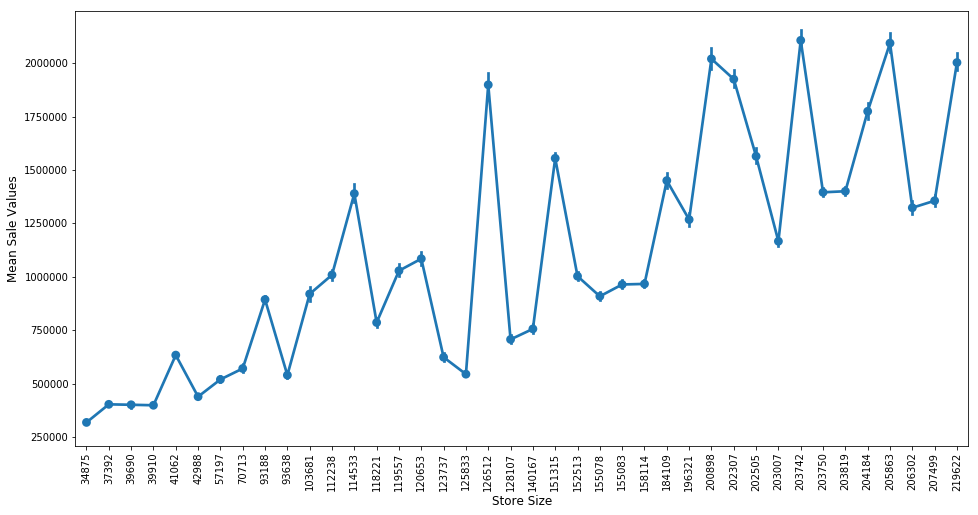

In [32]:
plt.figure(figsize = (16,8))
sns.pointplot(store_weekly_sales_df['Size'],store_weekly_sales_df['Weekly_Sales'])
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Store Size', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

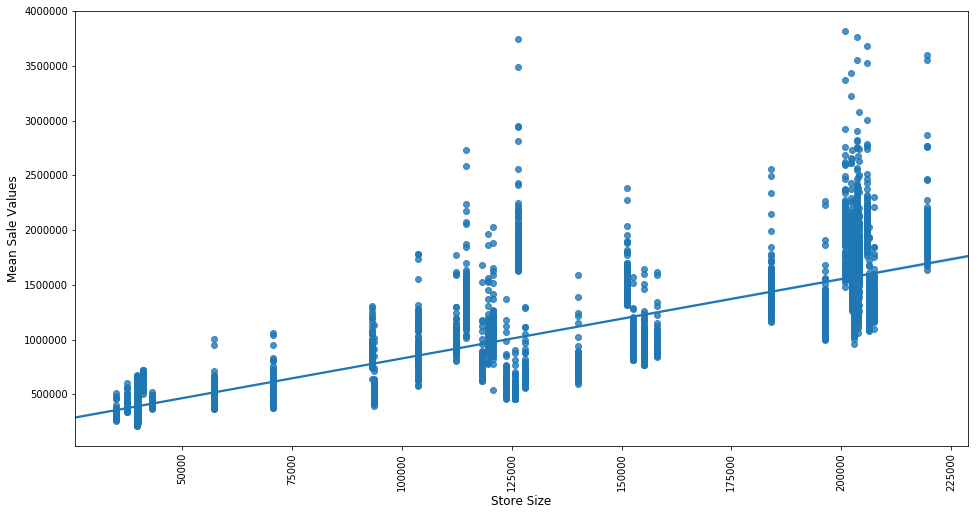

In [33]:
plt.figure(figsize = (16,8))
sns.regplot(x=store_weekly_sales_df['Size'],y=store_weekly_sales_df['Weekly_Sales'])
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Store Size', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

We see from the above graph that usually with increase in store size we are getting more sales value. But there are few exception, like for the store with size 126512 the sales value is very high. Only 4 stores have sales value more than that store. 21 stores are bigger than that store. Let’s analyze that store more as what is causing the sale hike. 

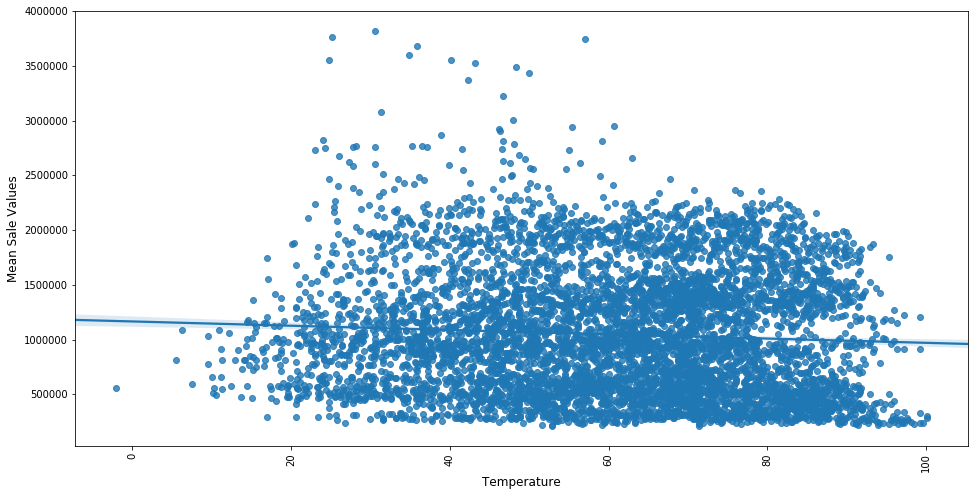

In [34]:
plt.figure(figsize = (16,8))
sns.regplot(x=store_weekly_sales_df['Temperature'],y=store_weekly_sales_df['Weekly_Sales'])
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Temperature', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
store_weekly_sales_df['Date'] = pd.to_datetime(store_weekly_sales_df['Date'])
store_weekly_sales_df['Year'] = store_weekly_sales_df['Date'].dt.year
store_weekly_sales_df['Month'] = store_weekly_sales_df['Date'].dt.month

In [36]:
store_weekly_sales_df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Year,Month
0,1,2010-02-05,1643690.90,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,A,151315,2010,2
1,1,2010-02-12,1641957.44,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,A,151315,2010,2
2,1,2010-02-19,1611968.17,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315,2010,2
3,1,2010-02-26,1409727.59,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,A,151315,2010,2
4,1,2010-03-05,1554806.68,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,A,151315,2010,3
5,1,2010-03-12,1439541.59,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,False,A,151315,2010,3
6,1,2010-03-19,1472515.79,54.58,2.720,0.00,0.00,0.00,0.00,0.00,211.215635,8.106,False,A,151315,2010,3
7,1,2010-03-26,1404429.92,51.45,2.732,0.00,0.00,0.00,0.00,0.00,211.018042,8.106,False,A,151315,2010,3
8,1,2010-04-02,1594968.28,62.27,2.719,0.00,0.00,0.00,0.00,0.00,210.820450,7.808,False,A,151315,2010,4
9,1,2010-04-09,1545418.53,65.86,2.770,0.00,0.00,0.00,0.00,0.00,210.622857,7.808,False,A,151315,2010,4


In [37]:
a = store_weekly_sales_df.groupby(['Year','Month'])['Weekly_Sales'].sum().reset_index()
b= a[a['Year'] == 2010]

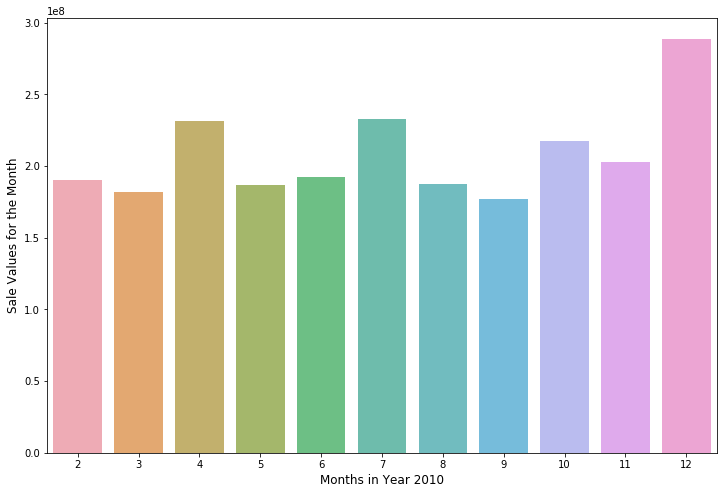

In [38]:
plt.figure(figsize = (12,8))
sns.barplot(b['Month'], b['Weekly_Sales'], alpha=0.8)
plt.ylabel('Sale Values for the Month', fontsize=12)
plt.xlabel('Months in Year 2010', fontsize=12)
#plt.legend()
plt.show()

We see that December month is the maximum sales.

In [39]:
store_weekly_sales_df[(store_weekly_sales_df['Store'] == 20) & (store_weekly_sales_df['Month']==12)]

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Year,Month
2760,20,2010-12-03,2416051.17,35.47,3.046,0.00,0.00,0.00,0.00,0.00,204.824919,7.484,False,A,203742,2010,12
2761,20,2010-12-10,2752122.08,24.27,3.109,0.00,0.00,0.00,0.00,0.00,204.687738,7.484,False,A,203742,2010,12
2762,20,2010-12-17,2819193.17,24.07,3.140,0.00,0.00,0.00,0.00,0.00,204.632119,7.484,False,A,203742,2010,12
2763,20,2010-12-24,3766687.43,25.17,3.141,0.00,0.00,0.00,0.00,0.00,204.637673,7.484,False,A,203742,2010,12
2764,20,2010-12-31,1799737.79,28.85,3.179,0.00,0.00,0.00,0.00,0.00,204.643227,7.484,True,A,203742,2010,12
2812,20,2011-12-02,2298776.83,46.32,3.452,10007.34,60.00,25959.98,6140.65,35675.62,211.639431,7.082,False,A,203742,2011,12
2813,20,2011-12-09,2546123.78,41.64,3.415,9458.19,81.50,791.04,5254.23,11447.14,211.866786,7.082,False,A,203742,2011,12
2814,20,2011-12-16,2762816.65,37.16,3.413,5488.56,217.03,1776.71,466.19,4535.27,212.068504,7.082,False,A,203742,2011,12
2815,20,2011-12-23,3555371.03,40.19,3.389,1483.17,80.15,2145.46,38.97,4180.29,212.236040,7.082,False,A,203742,2011,12
2816,20,2011-12-30,2043245.00,36.35,3.389,6918.65,97740.99,270.38,1648.03,2852.19,212.403576,7.082,True,A,203742,2011,12


In [50]:
a = final_df.groupby('Dept')['Store'].nunique().reset_index()
a[a['Store']<45]

,Dept,Store
17,19,38
25,27,44
26,28,43
27,29,40
28,30,37
32,34,43
33,35,39
34,36,39
35,37,20
37,39,5


From the above analysis we found that out of 99 departments only 72 is available in all the 45 Walmart Stores

Lets just analyize department # 92 and see what all insights we get on the weekly sales.

In [55]:
b= final_df[final_df['Dept']==92]
b.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
67,1,92,2010-02-05,139884.94,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
139,1,92,2010-02-12,143081.42,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
212,1,92,2010-02-19,135066.75,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
284,1,92,2010-02-26,125048.08,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
357,1,92,2010-03-05,132945.44,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [53]:
b.groupby('IsHoliday_x')['Weekly_Sales'].mean()

IsHoliday_x
False    74895.228867
True     79323.104667
Name: Weekly_Sales, dtype: float64

On holiday week, mean sales for that department is more than non holiday week

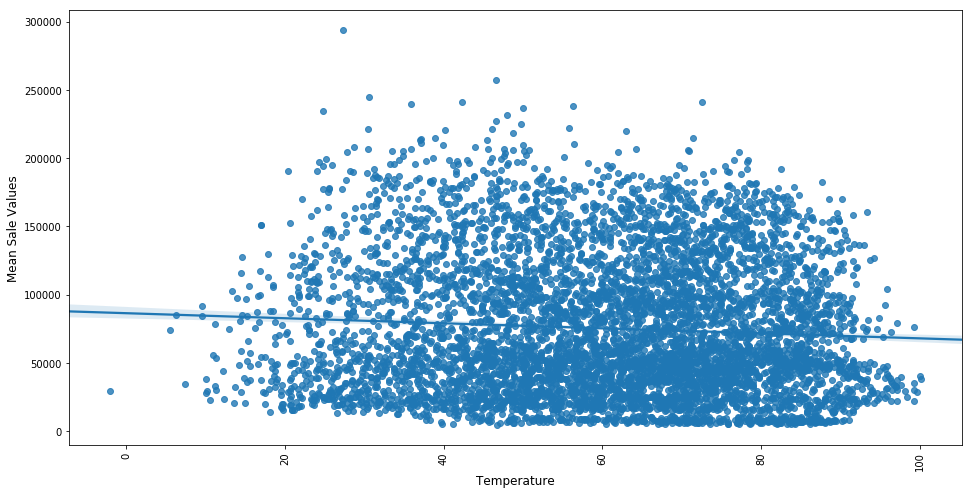

In [60]:
plt.figure(figsize = (16,8))
sns.regplot(x=b['Temperature'],y=b['Weekly_Sales'])
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Temperature', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

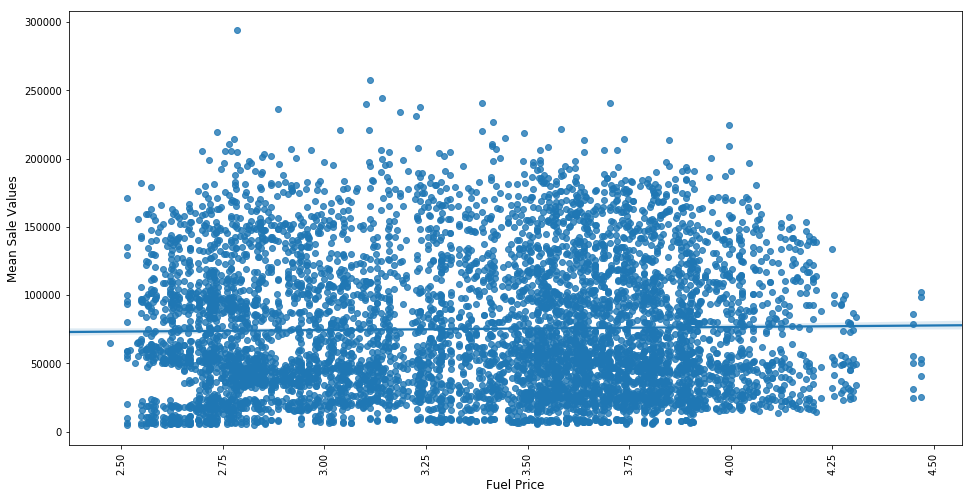

In [65]:
plt.figure(figsize = (16,8))
sns.regplot(x=b['Fuel_Price'],y=b['Weekly_Sales'])
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Fuel Price', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

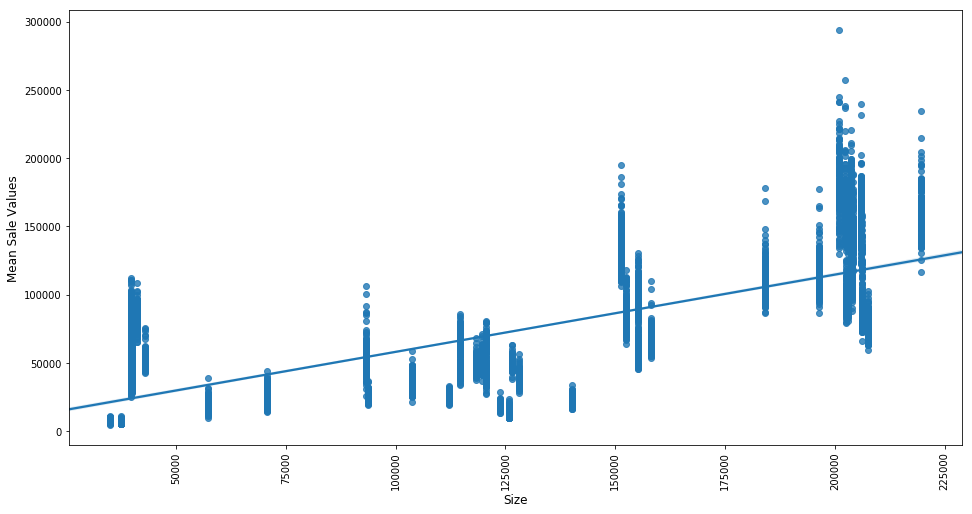

In [66]:
plt.figure(figsize = (16,8))
sns.regplot(x=b['Size'],y=b['Weekly_Sales'])
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Size', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

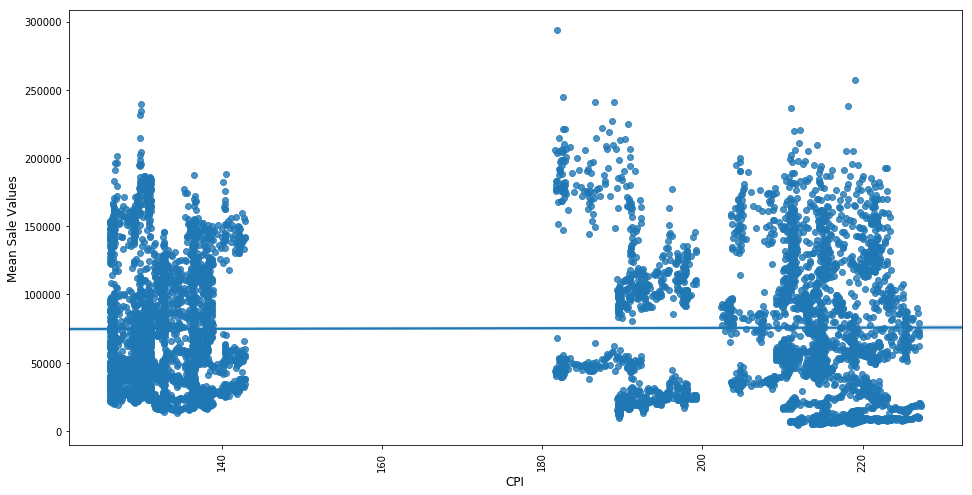

In [67]:
plt.figure(figsize = (16,8))
sns.regplot(x=b['CPI'],y=b['Weekly_Sales'])
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('CPI', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

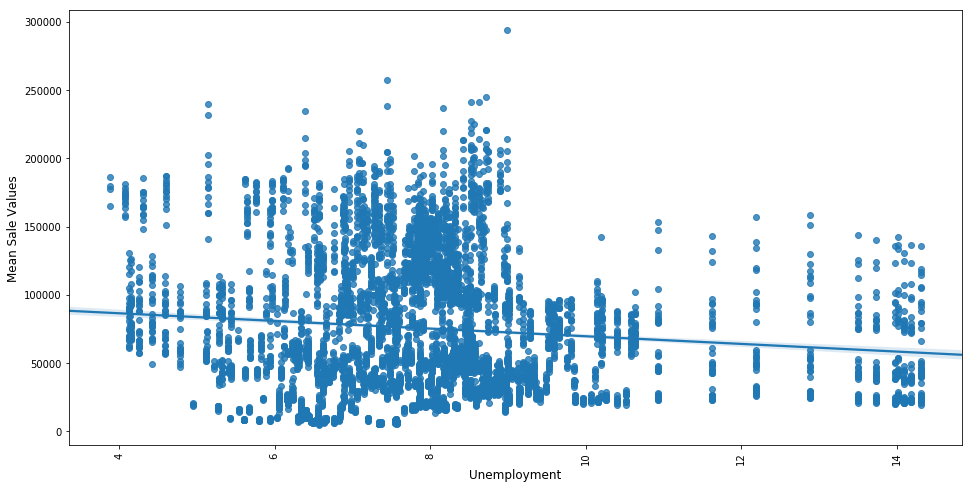

In [68]:
plt.figure(figsize = (16,8))
sns.regplot(x=b['Unemployment'],y=b['Weekly_Sales'])
plt.ylabel('Mean Sale Values', fontsize=12)
plt.xlabel('Unemployment', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
b['Fuel_Price'].min()

2.472

In [86]:
def bucket_of_temp(var1):
    if (var1 >= 90) & (var1 < 101):
        a = 'Very Hot'
    elif (var1 >= 80) & (var1 < 90):
        a = 'Hot'
    elif (var1 >= 60) & (var1 < 80):
        a = 'Average'
    elif (var1 >= 40) & (var1 < 60):
        a = 'Cold'
    elif (var1 >= 20) & (var1 < 40):
        a = 'Chilling'   
    elif (var1 >= -3) & (var1 < 20):
        a = 'Very Chill' 
    else:
        a = 'Frozen'
    return a 

In [90]:
def bucket_of_fp(var1):
    if (var1 >= 4.5) & (var1 < 5):
        a = 'Fp V High'
    elif (var1 >= 4) & (var1 < 4.5):
        a = 'Fp High'
    elif (var1 >= 3.5) & (var1 < 4):
        a = 'Fp high Average'
    elif (var1 >= 3) & (var1 < 3.5):
        a = 'Fp Low Average'
    elif (var1 >= 2.5) & (var1 < 3):
        a = 'Fp Low'   
    else:
        a = 'Fp V Low'
    return a 

In [91]:
b['bucket_of_temp'] = b['Temperature'].apply(bucket_of_temp)
b['bucket_of_fp'] = b['Fuel_Price'].apply(bucket_of_fp)

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
c = b.groupby(['bucket_of_temp','bucket_of_fp'])['Weekly_Sales'].mean().reset_index()
z = c.pivot('bucket_of_temp','bucket_of_fp','Weekly_Sales')


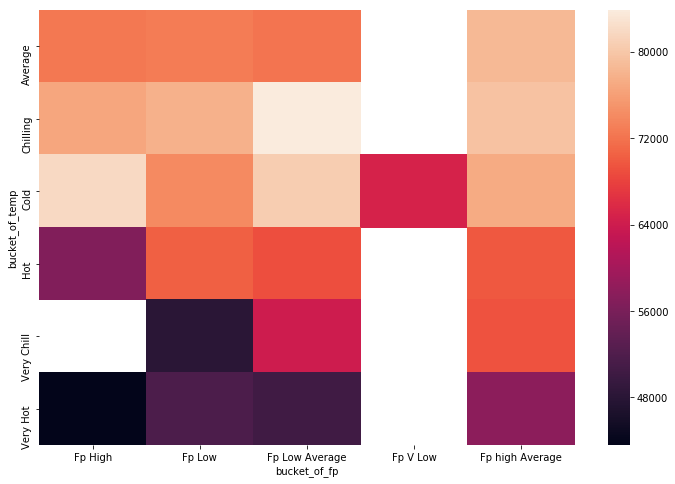

In [95]:
plt.figure(figsize = (12,8))
sns.heatmap(z)
plt.show()